In [1]:
import pandas as pd
df=pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,result
0,41.00000,190.000000,7.4,67,0
1,36.00000,118.000000,8.0,72,0
2,12.00000,149.000000,12.6,74,0
3,18.00000,313.000000,11.5,62,0
4,42.12931,185.931507,14.3,56,1


In [2]:
df.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'result'], dtype='object')

In [3]:
df.shape

(153, 5)

In [4]:
df.describe()

,Ozone,Solar.R,Wind,Temp,result
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,0.529412
std,28.693372,87.960267,3.523001,9.465270,0.500773
min,1.000000,7.000000,1.700000,56.000000,0.000000
25%,21.000000,120.000000,7.400000,72.000000,0.000000
50%,42.129310,194.000000,9.700000,79.000000,1.000000
75%,46.000000,256.000000,11.500000,85.000000,1.000000
max,168.000000,334.000000,20.700000,97.000000,1.000000


In [5]:
df.groupby("result").mean()

,Ozone,Solar.R,Wind,Temp
result,,,,
0,20.902778,166.302702,11.270833,72.652778
1,60.997339,203.379334,8.790123,82.530864


In [6]:
df["result"].value_counts()

1    81
0    72
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

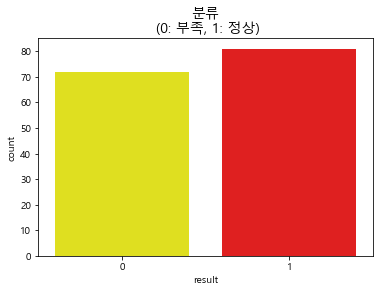

In [7]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(\
fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

colors=["yellow","red"]
sns.countplot('result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)',fontsize=14)

In [8]:
train_cols=df.columns[:-2]
X=df[train_cols]
y=df['result']

In [9]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [10]:
# from imblearn.over_sampling import SMOTE
# X_sample, y_sample = SMOTE(random_state=0).fit_resample(X, y)
# X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
# y_samp = pd.DataFrame(data=y_sample,columns=['result'])
# df_samp=pd.concat([X_samp,y_samp],axis=1)

In [11]:
df_samp["result"].value_counts()

0    72
1    72
Name: result, dtype: int64

In [12]:
X = X_samp[train_cols]
y = y_samp['result']

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


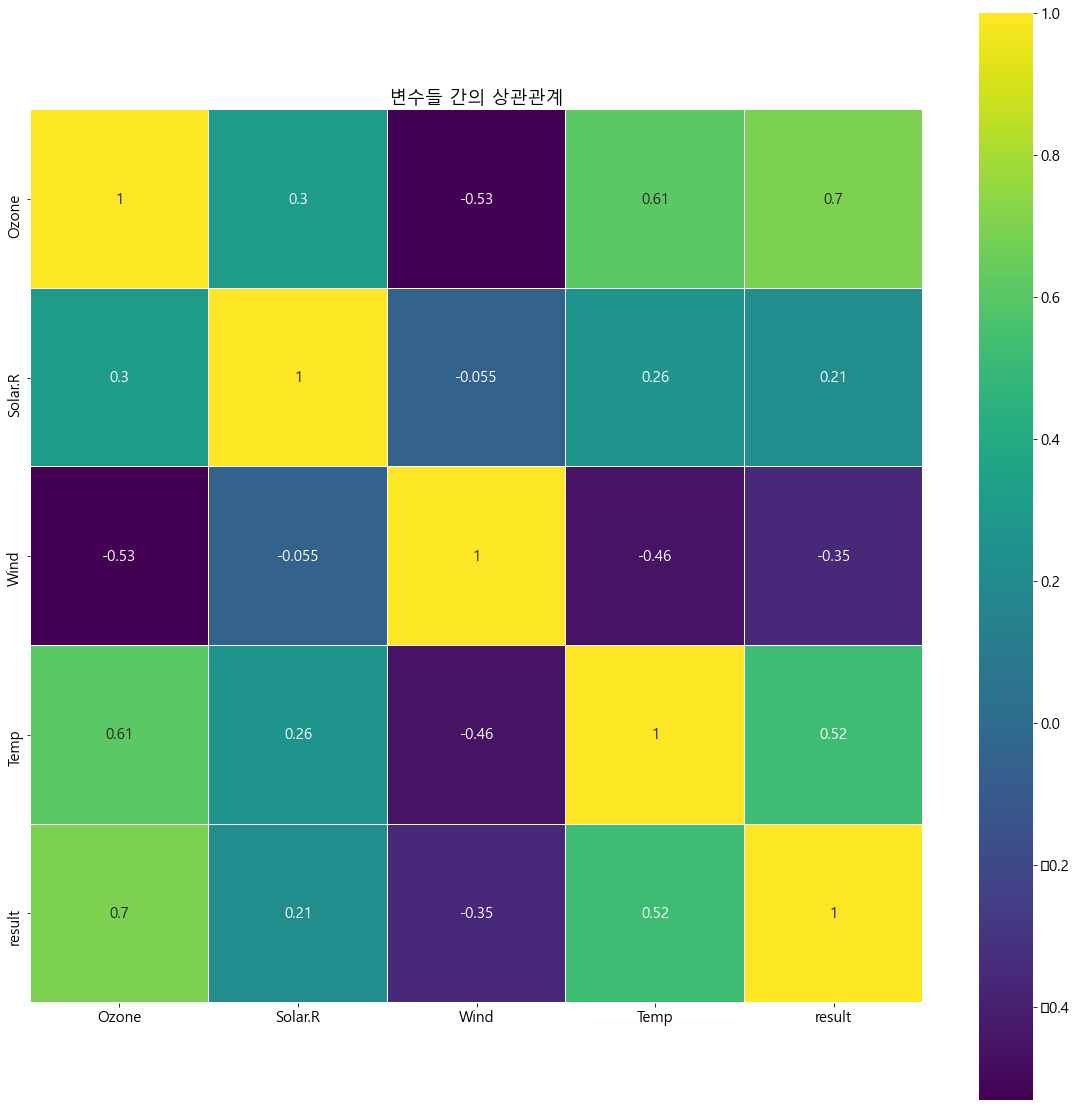

In [13]:
plt.figure(figsize=(20, 20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True,
annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('변수들 간의 상관관계')
plt.show()

In [14]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2, random_state=7)

In [15]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train.columns),),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [21]:
X_train_scaled=X_train
X_test_scaled=X_test

In [22]:
hist=model.fit(X_train_scaled,y_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9478
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9826
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9391
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9565
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9478
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9565
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9391
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9478
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9391
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9565
Epoch 11/1000
4/4 [

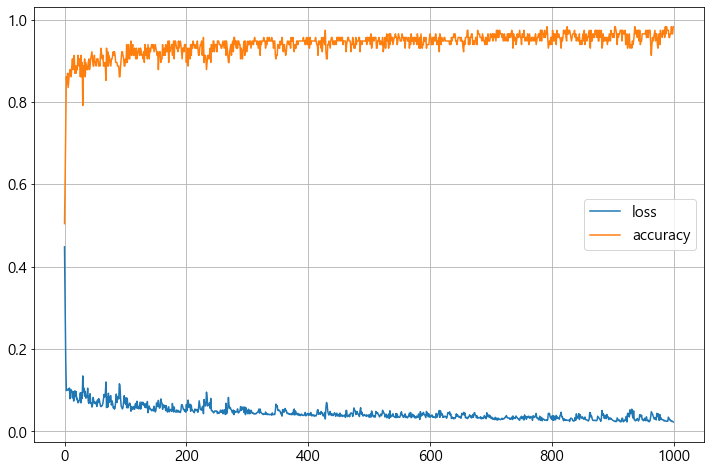

In [18]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [19]:
scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 999us/step - loss: 0.0222 - accuracy: 0.9739
[0.022211475297808647, 0.9739130139350891]
accuracy: 97.39%
1/1 [==============================] - 0s 15ms/step - loss: 0.0909 - accuracy: 0.8966
[0.09090252220630646, 0.8965517282485962]
accuracy: 89.66%


In [24]:
test_set = [[25, 10.8, 71]]
print(model.predict(test_set))
test_set = [[255, 4.3, 90]]
print(model.predict(test_set))

[[0.]]
[[0.]]


In [25]:
test_set =[[25, 10.8, 71]]
print(model.predict(test_set))
test_set = [[255, 4.3, 90]]
print(model.predict(test_set))

[[0.]]
[[0.]]


In [26]:
model.save('c:/data/ozone/ozone_keras.model')
model.save_weights('c:/data/ozone/ozone.weight')

INFO:tensorflow:Assets written to: c:/data/ozone/ozone_keras.model\assets
